In [1]:
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from pandas_profiling import ProfileReport

%matplotlib inline
import matplotlib
import seaborn as sns
%reload_ext autoreload
%autoreload 2

import datetime
from datetime import datetime
plt.style.use('fivethirtyeight')

import statsmodels.api as sm

In [2]:
df = pd.read_csv('Bank_churn_data.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.reset_index()

,index,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df.drop(['Surname'],inplace=True,axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.shape

(10000, 11)

In [10]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [12]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
# Encoding data

df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
df = pd.get_dummies(df,drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


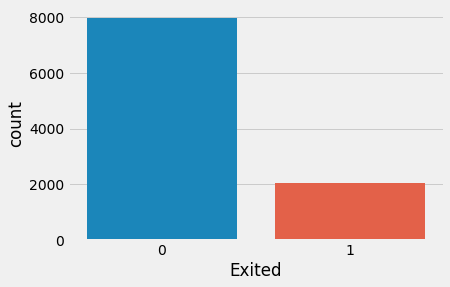

In [15]:
# visualization of exited data
sns.countplot(df['Exited']);

# Handling imbalace data set

In [16]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE
import imblearn

In [17]:
x = df.drop('Exited',axis =1)
y = df['Exited']


from imblearn.over_sampling import SMOTE
x_res,y_res = SMOTE().fit_resample(x,y)

y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [18]:
# creating data

x = df.drop('Exited',axis =1)
y = df['Exited']

In [19]:
from sklearn.model_selection import train_test_split

# Setup random seed
np.random.seed(42)

# Create feature matrixs
x = df.drop('Exited',axis =1)
y = df['Exited']

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2)


In [20]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# model

In [21]:
# logistic regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression


lgr = LogisticRegression()
lgr.fit(x_train,y_train)

y_pred1 = lgr.predict(x_test)

accuracy_score(y_test, y_pred1)


# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred1) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred1):.2f}")
print(f"Recall: {recall_score(y_test, y_pred1):.2f}")
print(f"F1: {f1_score(y_test, y_pred1):.2f}")


Classifier metrics on the test set:
Accuracy: 78.28%
Precision: 0.77
Recall: 0.79
F1: 0.78


In [22]:
# linear svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm


svm = svm.SVC()

svm.fit(x_train,y_train)

y_pred2 = svm.predict(x_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred2) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred2):.2f}")
print(f"Recall: {recall_score(y_test, y_pred2):.2f}")
print(f"F1: {f1_score(y_test, y_pred2):.2f}")


Classifier metrics on the test set:
Accuracy: 83.99%
Precision: 0.83
Recall: 0.85
F1: 0.84


In [23]:
# KNN model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier


knc = KNeighborsClassifier()
knc.fit(x_train,y_train)

y_pred3 = knc.predict(x_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred3) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred3):.2f}")
print(f"Recall: {recall_score(y_test, y_pred3):.2f}")
print(f"F1: {f1_score(y_test, y_pred3):.2f}")



Classifier metrics on the test set:
Accuracy: 81.42%
Precision: 0.79
Recall: 0.84
F1: 0.81


In [24]:
# DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

y_pred4 = dtc.predict(x_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred4) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred4):.2f}")
print(f"Recall: {recall_score(y_test, y_pred4):.2f}")
print(f"F1: {f1_score(y_test, y_pred4):.2f}")


Classifier metrics on the test set:
Accuracy: 78.66%
Precision: 0.77
Recall: 0.80
F1: 0.79


In [25]:
# RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred5 = rfc.predict(x_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred5) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred5):.2f}")
print(f"Recall: {recall_score(y_test, y_pred5):.2f}")
print(f"F1: {f1_score(y_test, y_pred5):.2f}")


Classifier metrics on the test set:
Accuracy: 85.50%
Precision: 0.84
Recall: 0.86
F1: 0.85


In [26]:
final_data = pd.DataFrame({'Models ' : ['LGR','SVM','KNN','DTC','RFC'],
                           'accuracy' : [precision_score(y_test, y_pred1),
                                      precision_score(y_test, y_pred2),
                                      precision_score(y_test, y_pred3),
                                      precision_score(y_test, y_pred4),
                                      precision_score(y_test, y_pred5)]})

final_data

,Models,accuracy
0,LGR,0.767890
1,SVM,0.829438
2,KNN,0.792097
3,DTC,0.770279
4,RFC,0.844599


<AxesSubplot:xlabel='Models', ylabel='accuracy'>

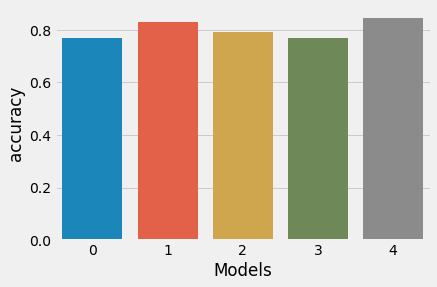

In [27]:
# visualisation

final_data['Models']= final_data.index

sns.barplot(x="Models", y="accuracy", data=final_data)

In [28]:
x_res = sc.fit_transform(x_res)

In [29]:
# train our model on entire data set
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_res,y_res)

RandomForestClassifier()

In [30]:
# testing our model
rfc.predict([[619,42,2,0.0,0,0,0,101348.8,0,0,0]])

array([1], dtype=int64)

In [31]:
# saving our model

import joblib

joblib.dump(rfc,'RFC_MODEL_for_Bank_customer')

['RFC_MODEL_for_Bank_customer']

In [32]:
# loading model

mdl = joblib.load('RFC_MODEL_for_Bank_customer')

In [33]:
mdl.predict([[619,42,2,0.0,0,0,0,101349,0,0,0]])

array([1], dtype=int64)

In [34]:
# Testing our RFC model on new dataset

RFC_pred = mdl.predict([[619,42,2,0.0,0,0,0,101349,0,0,0]])

if RFC_pred == 0:
    print('customer not left')
    
else:
    print('customer left')



customer left


# GUI

In [35]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib
from pandasgui import show

In [36]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=float(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=float(e8.get())
    p9=int(e9.get())
    
    if p9==1:
        Geography_Germany=1
        Geography_Spain=0
        Geography_France=0
    elif p9==2:
        Geography_Germany=0
        Geography_Spain=1
        Geography_France=0
    elif p9==3:
        Geography_Germany=0
        Geography_Spain=0
        Geography_France=1
        
    p10=int(e10.get())
    mdl = joblib.load('RFC_MODEL_for_Bank_customer')
    RFC_pred = mdl.predict(sc.transform([[p1,p2,p3,p4,
                                              p5,p6,
                                              p7,p8,Geography_Germany,Geography_Spain,p10]]))

    if RFC_pred == 0:
        Label(master,text="Customer not left").grid(row=31)
    
    else:
        Label(master,text="Customer left").grid(row=31)
        
        
master = Tk()
master.title("Bank customer churn rate")

label=Label(master,text="Bank customer churn rate"
                         ,bg="blue",fg="white").\
                        grid(row=0,columnspan=2) 



Label(master,text="CreditScore").grid(row=1)
Label(master,text="age").grid(row=2)
Label(master,text="tenure").grid(row=3)
Label(master,text="Balance").grid(row=4)
Label(master,text="NumOfProducts").grid(row=5)
Label(master,text="has cr card").grid(row=6)
Label(master,text="IsActiveMember").grid(row=7)
Label(master,text="EstimatedSalary").grid(row=8)
Label(master,text="Geography(G1,S2,F3)").grid(row=9)
Label(master,text="Gender(M1,F0)").grid(row=10)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 =Entry(master)
        
e1.grid(row=1 , column=1)
e2.grid(row=2 , column=1)
e3.grid(row=3 , column=1)
e4.grid(row=4 , column=1)
e5.grid(row=5 , column=1)
e6.grid(row=6 , column=1)
e7.grid(row=7 , column=1)
e8.grid(row=8 , column=1)
e9.grid(row=9 , column=1)
e10.grid(row=10 , column=1)


Button(master,text='Predict',command=show_entry_fields).grid()
mainloop()
         